# Practice Exercise: k-Means Clustering with Pandas

## Scenario:
You’re tasked with clustering student test scores into **2 groups** (`k=2`). The dataset contains two features:
1. **Math Scores**: Represents students' performance in Mathematics.
2. **English Scores**: Represents students' performance in English.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize the data
data = pd.DataFrame({
    "Math Scores": [78, 72, 90, 60, 58, 88, 54, 95, 59, 92],
    "English Scores": [85, 80, 92, 65, 62, 89, 58, 94, 60, 88]
})

data.head(5)

,Math Scores,English Scores
0,78,85
1,72,80
2,90,92
3,60,65
4,58,62


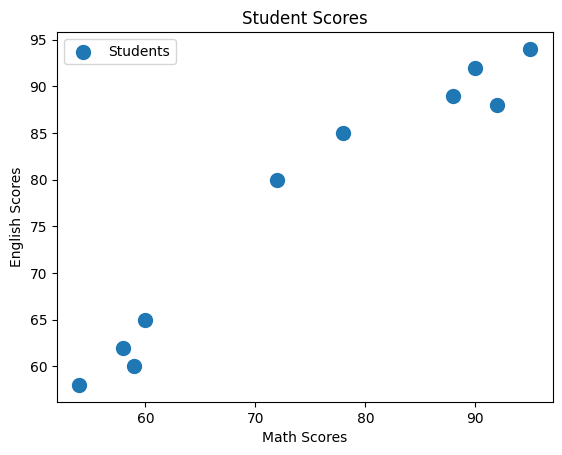

In [15]:
# Visualize the data
plt.scatter(data['Math Scores'], data['English Scores'], label = 'Students', s = 100) # S is the size of the dots
plt.xlabel('Math Scores')
plt.ylabel('English Scores')
plt.title('Student Scores')
plt.legend()
plt.show()

In [12]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters = 2, random_state = 12)
data['Cluster'] = kmeans.fit_predict(data)
data

,Math Scores,English Scores,Cluster
0,78,85,0
1,72,80,0
2,90,92,0
3,60,65,1
4,58,62,1
5,88,89,0
6,54,58,1
7,95,94,0
8,59,60,1
9,92,88,0


In [13]:
# Gather Centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ['Math Scores', 'English Scores'])
centroids

,Math Scores,English Scores
0,85.833333,88.00
1,57.750000,61.25


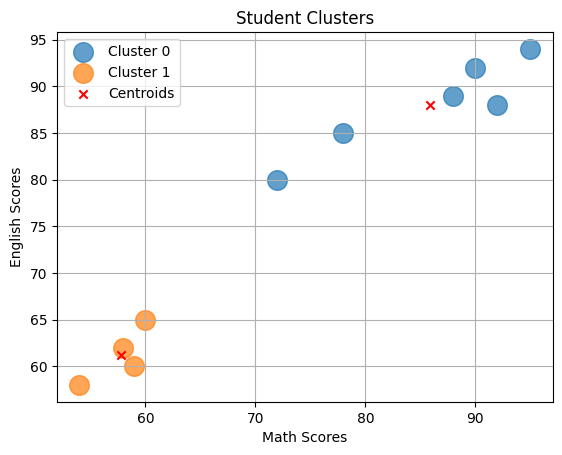

In [18]:
# Visualize the data with centroids
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Math Scores'], cluster_data['English Scores'], label = f'Cluster {cluster}', s = 200, alpha = 0.7)
    # alpha is the transparency of the dots

plt.scatter(centroids['Math Scores'], centroids['English Scores'], color = 'red', marker = 'x', label = 'Centroids')
plt.xlabel('Math Scores')
plt.ylabel('English Scores')
plt.title('Student Clusters')
plt.legend()
plt.grid()
plt.show()

In [19]:
# Summary
cluster_summary = data.groupby('Cluster').mean()
cluster_summary

,Math Scores,English Scores
Cluster,,
0,85.833333,88.00
1,57.750000,61.25


In [20]:
# Silhouette Score for Performance Evaluation
from sklearn.metrics import silhouette_score
score = silhouette_score(data[['Math Scores', 'English Scores']], data['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.7278856090264391
